In [1]:
import urllib.request
from selenium.webdriver.common.keys import Keys
from selenium import webdriver
import time
#######################################
import numpy as np
import pandas as pd
from urllib.request import urlopen
from urllib import parse
from urllib.request import Request
from urllib.error import HTTPError
from bs4 import BeautifulSoup
import json

In [4]:
conda install sklearn

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.

Note: you may need to restart the kernel to use updated packages.



PackagesNotFoundError: The following packages are not available from current channels:

  - sklearn

Current channels:

  - https://repo.anaconda.com/pkgs/main/win-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/win-64
  - https://repo.anaconda.com/pkgs/r/noarch
  - https://repo.anaconda.com/pkgs/msys2/win-64
  - https://repo.anaconda.com/pkgs/msys2/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [1]:
from sklearn.cluster import KMeans

ImportError: DLL load failed while importing _arpack: 지정된 프로시저를 찾을 수 없습니다.

In [4]:
def get_address(word):
    binary = 'c:\\chromedriver\\chromedriver.exe'
    browser = webdriver.Chrome(binary) 
    
    word = word.split(' ')
    ls = []
    ls_word =""
    for i in range(len(word)-1) :
        ls.append(word[i]+'%20')
    for j in range(len(ls)):
        ls_word += ls[j]
    ls_word += word[len(ls)]
    browser.get("https://m.map.naver.com/search2/search.naver?query={}&sm=hty&style=v5".format(ls_word))
    time.sleep(1)
    
    source1 = browser.find_elements_by_xpath('//*[@id="ct"]/div[2]/ul/li/div[1]/a[2]/div')
    source2 = browser.find_elements_by_xpath('//*[@id="ct"]/div[2]/ul/li/div[1]/a[2]/div')
    source3 = browser.find_elements_by_xpath('//*[@id="ct"]/div[2]/ul/li/div[1]/div[1]/div')
#     source1 = browser.find_elements_by_xpath('//*[@id="ct"]/div[2]/ul/li'

    ls_1 = [ele.find_element_by_tag_name('strong').text for ele in source1]
    ls_2 = [ele.find_element_by_tag_name('em').text for ele in source2]
    ls_3 = [ele.find_element_by_tag_name('a').text for ele in source3]
    ls_4 = []
    ls_no = np.arange(1,len(ls_1)+1)
    for m in range(len(ls_1)) :
        ll = ls_3[m].split('\n')
        ls_4.append(ll[1])
    
    time.sleep(2)
    browser.quit()
#     print(ls_1)
#     print(ls_2)
#     print(ls_3)
#     print(len(ls_4))
#     print(ls_no)
#     print('-----------------------------------')
    
    # naver map api key
    client_id = 'c84ldg6zyl'#개인 아이디
    client_pw = 'HBYHOOFIOpIf8x2y06Ba6oyyM202q7d6hg3dykk9' #개인 비밀번호

    api_url = 'https://naveropenapi.apigw.ntruss.com/map-geocode/v2/geocode?query='

# 크롤링에서 받아온 데이터를 정제하자. 예시데이터임

# 크롤링에서 받아온 구주소
# address_gu = ['서울특별시 관악구 신림동 675-248번지', '서울특별시 관악구 신림동 1638-7번지',
#               '서울특별시 관악구 신림동 94-107번지', '서울특별시 관악구 신림동 1735-2번지',
#               '서울특별시 관악구 신림동 1578-36번지', '서울특별시 관악구 신림동 1669-6번지',
#               '서울특별시 관악구 신림동 95-73번지', '서울특별시 관악구 신림동 92-251번지',
#               '서울특별시 관악구 신림동 1536-2번지', '서울특별시 관악구 신림동 1423-21번지']
#크롤링에서 받아온 도로명 주소
# address_do = ['서울특별시 관악구 난향9길  15-3', '서울특별시 관악구 신림로59길  15-10',
#               '서울특별시 관악구 신림로36길  16', '서울특별시 관악구 난곡로  63',
#               '서울특별시 관악구 남부순환로172길  16-7', '서울특별시 관악구 남부순환로  1391',
#               '서울특별시 관악구 쑥고개로2가길  22', '서울특별시 관악구 신림로  248',
#               '서울특별시 관악구 신림로17길  32', '서울특별시 관악구 봉천로12길  65']

#     print(len(list(ls_no)), len(ls_1), len(ls_2), len(ls_4))
    data = np.array([list(ls_no), ls_1, ls_2, ls_4])
    data = data.T
#     data_df = pd.DataFrame(data)
    data_df = pd.DataFrame(data, columns=['No', '상호','업종', '도로명주소'])
    data_df.tail(3)

# 네이버 지도 API 이용해서 위경도 찾기
    geo_coordi = []      # geographic coordinates
    for add in data_df['도로명주소']:
        add_urlenc = parse.quote(add)  # 주소를 URL에서 사용할 수 있도록 URL Encoding
        url = api_url + add_urlenc
        request = Request(url)
        request.add_header('X-NCP-APIGW-API-KEY-ID', client_id)
        request.add_header('X-NCP-APIGW-API-KEY', client_pw)
        try:
            response = urlopen(request)
        except HTTPError as e:
            print('HTTP Error!')
            latitude = None
            longitude = None
        else:
            rescode = response.getcode() # 정상이면 200리턴
            if rescode == 200:
                response_body = response.read().decode('utf-8')
                response_body = json.loads(response_body)   # json
                if response_body['addresses'] == [] :
                    print("'result' not exist!")
                    latitude = None
                    longitude = None
                else:
                    latitude = response_body['addresses'][0]['y']
                    longitude = response_body['addresses'][0]['x']
                    print("Success!")
            else:
                print('Response error code : %d' % rescode)
                latitude = None
                longitude = None

        geo_coordi.append([latitude, longitude])


    np_geo_coordi = np.array(geo_coordi)
    pd_geo_coordi = pd.DataFrame({"상호" :data_df['상호'].values,
                                  "업종" :data_df['업종'].values,
                                  "도로명": data_df['도로명주소'].values,
                                  "위도": np_geo_coordi[:, 0], "경도": np_geo_coordi[:, 1]})
    # print(pd_geo_coordi)
    writer = pd.ExcelWriter('output1.xlsx')
    pd_geo_coordi.to_excel(writer, sheet_name='Sheet1')
    writer.save()

    load_data = pd.read_excel('output1.xlsx')
    address_point = pd.DataFrame(load_data)
    latitude_point = address_point['위도']
    longitude_point = address_point['경도']
    global pp
    pp = []
    for point in zip(latitude_point, longitude_point) :
        pp.append(list(point))

    
    global address
    address=[]
    for k in zip(ls_no, ls_1, ls_2, ls_4, latitude_point, longitude_point):
        address.append(list(k))
    return address

In [5]:
get_address('성북 냉면')

Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!


[[1, '성북동면옥집', '한식', '서울특별시 성북구 대사관로 40', 37.5959026, 126.9886386],
 [2, '성북동돼지갈비 본점', '돼지고기구이', '서울특별시 성북구 성북로 115', 37.5933014, 126.996085],
 [3, '서울면옥', '냉면', '서울특별시 성북구 창경궁로 321-1', 37.588384, 127.0052766],
 [4, '자연에서왔소본점', '소고기구이', '서울특별시 성북구 성북로 36', 37.5911794, 127.003811],
 [5, '성북면가', '냉면', '서울특별시 성북구 동소문로 67', 37.5918393, 127.0127331],
 [6, '청수장', '한식', '서울특별시 성북구 정릉로 237-2', 37.6053151, 127.0107777],
 [7, '북촌손만두 북촌점', '칼국수,만두', '서울특별시 종로구 북촌로4길 10', 37.5791372, 126.9857735],
 [8, '북악정', '육류,고기요리', '서울특별시 종로구 평창36길 6 북악정', 37.6113395, 126.9777722],
 [9, '봉피양 경복궁점', '한식', '서울특별시 종로구 자하문로 20', 37.5779058, 126.9723057],
 [10, '삼청동 만정', '소고기구이', '서울특별시 종로구 삼청로 124-2 RH타운', 37.5863109, 126.9820098],
 [11, '혜화면옥', '냉면', '서울특별시 성북구 보문로 193-1 1층', 37.5908263, 127.0138867],
 [12, '화동옥', '한식', '서울특별시 종로구 창덕궁1길 40', 37.5794573, 126.987002],
 [13, '육쌈냉면 대학로점', '냉면', '서울특별시 종로구 창경궁로34길 5', 37.5847749, 127.001074],
 [14,
  '삼겹살 전문점 대통령',
  '돼지고기구이',
  '서울특별시 종로구 대학로14길 12-1',
  37.5838529,

In [6]:
pp

[[37.5959026, 126.9886386],
 [37.5933014, 126.996085],
 [37.588384, 127.0052766],
 [37.5911794, 127.003811],
 [37.5918393, 127.0127331],
 [37.6053151, 127.0107777],
 [37.5791372, 126.9857735],
 [37.6113395, 126.9777722],
 [37.5779058, 126.9723057],
 [37.5863109, 126.9820098],
 [37.5908263, 127.0138867],
 [37.5794573, 126.987002],
 [37.5847749, 127.001074],
 [37.5838529, 127.002727],
 [37.5860916, 127.0009187],
 [37.5887193, 127.0078875],
 [37.5811214, 127.0044923],
 [37.5785304, 126.9823093],
 [37.5954022, 127.0165318],
 [37.5782227, 126.9711511],
 [37.6041071, 127.01297],
 [37.5888146, 127.0161214],
 [37.578982, 127.0014121],
 [37.6022316, 127.0146414],
 [37.5862746, 127.0102881],
 [37.5922051, 127.0130836],
 [37.5821676, 127.0007442],
 [37.5913632, 127.0163406],
 [37.5812293, 127.0040614],
 [37.5888319, 127.0083213],
 [37.5890109, 127.0082115],
 [37.5923524, 127.0173309],
 [37.6024205, 127.0122789],
 [37.5881204, 126.9962239],
 [37.5881407, 127.0072494],
 [37.5838252, 127.0006762],
 

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

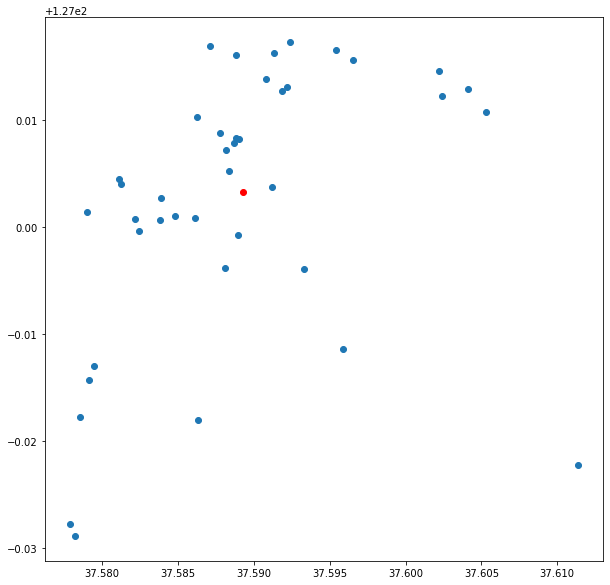

In [8]:
x = []; y=[];
for i in range(len(pp)) :
        x.append(pp[i][0])
        y.append(pp[i][1])
plt.figure(figsize=(10,10))
plt.scatter(x,y)
plt.scatter(37.589314262500004 , 127.00328064750002, c='red')

In [41]:
conda list

# packages in environment at C:\Users\JAY\anaconda3:
#
# Name                    Version                   Build  Channel
_ipyw_jlab_nb_ext_conf    0.1.0                    py38_0  
alabaster                 0.7.12             pyhd3eb1b0_0  
anaconda                  2021.05                  py38_0  
anaconda-client           1.7.2                    py38_0  
anaconda-navigator        2.0.3                    py38_0  
anaconda-project          0.9.1              pyhd3eb1b0_1  
anyio                     2.2.0            py38haa95532_2  
appdirs                   1.4.4                      py_0  
argh                      0.26.2                   py38_0  
argon2-cffi               20.1.0           py38h2bbff1b_1  
asn1crypto                1.4.0                      py_0  
astroid                   2.5              py38haa95532_1  
astropy                   4.2.1            py38h2bbff1b_1  
async_generator           1.10               pyhd3eb1b0_0  
atomicwrites              1.4.0       

In [13]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [ ]:
37.589314262500004 , 127.00328064750002

In [10]:
pip uninstall sklearn

^C
Note: you may need to restart the kernel to use updated packages.


In [9]:
import sklearn

ImportError: DLL load failed while importing _arpack: 지정된 프로시저를 찾을 수 없습니다.

In [11]:
conda list

# packages in environment at C:\Users\JAY\anaconda3:
#
# Name                    Version                   Build  Channel
_ipyw_jlab_nb_ext_conf    0.1.0                    py38_0  
alabaster                 0.7.12             pyhd3eb1b0_0  
anaconda                  2021.05                  py38_0  
anaconda-client           1.7.2                    py38_0  
anaconda-navigator        2.0.3                    py38_0  
anaconda-project          0.9.1              pyhd3eb1b0_1  
anyio                     2.2.0            py38haa95532_2  
appdirs                   1.4.4                      py_0  
argh                      0.26.2                   py38_0  
argon2-cffi               20.1.0           py38h2bbff1b_1  
asn1crypto                1.4.0                      py_0  
astroid                   2.5              py38haa95532_1  
astropy                   4.2.1            py38h2bbff1b_1  
async_generator           1.10               pyhd3eb1b0_0  
atomicwrites              1.4.0       

In [129]:
%%html
<!DOCTYPE html>
<html>
<head>
    <meta charset="UTF-8">
    <meta http-equiv="X-UA-Compatible" content="IE=edge">
    <meta name="viewport" content="width=device-width, initial-scale=1.0, maximum-scale=1.0, minimum-scale=1.0, user-scalable=no">
    <title>간단한 지도 표시하기</title>
    <script type="text/javascript" src="https://openapi.map.naver.com/openapi/v3/maps.js?ncpClientId=Your ID"></script>
</head>
<body>
<div id="map" style="width:100%;height:400px;"></div>

<script>
var mapOptions = {
    center: new naver.maps.LatLng(37.545112, 127.076617),
    zoom: 15
};

var map = new naver.maps.Map('map', mapOptions);


</script>


</body>
</html>

NameError: name 'ls_no' is not defined